# **Optimizing CO2 Emission Predictions in Canada: A Comparative Analysis of Hybrid Models and CatBoost Efficiency with Fuel Consumption Insights**

# **Dataset**

## https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

## The dataset on CO2 emissions includes **7385 rows and 12 columns**, detailing vehicle specifications like **Make**, **Model**, **Vehicle Class**, **Engine Size**, **Cylinders**, **Transmission**, **Fuel Type**, and **Fuel Consumption** (City, Highway, Combined). Covering a **7-year period** (1995–2014) in **Canada**, fuel consumption ratings are adjusted for 5-cycle testing to ensure comparability across model years.

# **1.Data Inspection**



## Below, We have explored the dataset's structure, check & handled missing values,speaculate summary statistics, visualizes correlations and feature distributions, inspects categorical data, and save the cleaned dataset.

# **2. Data Preprocessing**

## Encoding Categorical Variables(label encodding),Feature Scaling,Checking Outliear,Normalization,Feature Selection,Data balancing(Tomek) has been performed for train the best outcome of the model

# **3.Model training**

# Spliting training-testing, cross validation,Polynomial Features,regularization,standardized features,tuning hyperparameters with GridSearchCV, evaluating MAE and R², ploting learning curve, visualizing residuals, and feature importance has been performed among models such as-
# Linear Regression, Decision Tree, Random Forest, LSTM, Bidirectional LSTM, SVR, LightGBM, Xgboost, Catboost, Hybrid Model (Catboost,Knn,linear regression) etc

# **Outcome:**

  # **Best Models:**
## **Hybrid Model** & **CatBoost**: Top performance
##- **Random Forest**: Balanced results.
##- **Linear Regression**: Less effective.


 # **Key Features:**
## - **Fuel Consumption Comb (mpg)** & **Vehicle Class** were key.
##- High correlation between **Fuel Consumption Comb (mpg)** & **Fuel Type**.


 # **Limitations:**
## - **XGBoost** & **LightGBM**: Overfitting.
## - Multicollinearity has impact on stability.

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/content/CO2 Emissions_Canada.csv'
data = pd.read_csv(data_path)

# 1. Display basic information
print("Dataset Info:")
print(data.info())

# 2. Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# 3. Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7384 non-null   object 
 2   VehicleClass                      7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64

# Data Visualiazation

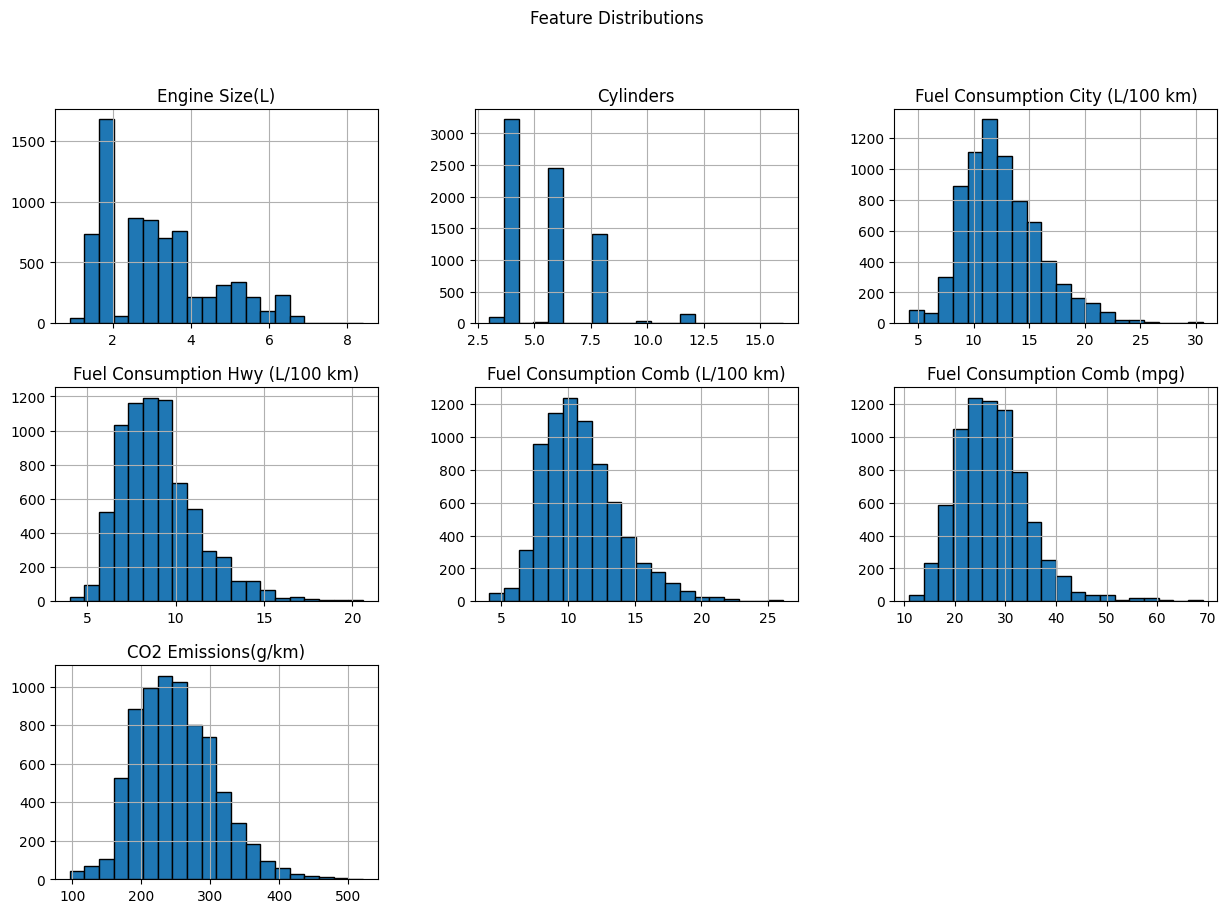


Cleaned dataset saved to cleaned_dataset.csv


In [314]:
# 5. Visualize feature distributions
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Save cleaned dataset for later use
cleaned_data_path = 'cleaned_dataset.csv'
data.to_csv(cleaned_data_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_data_path}")


# Univariate Data Visuliazation

<ipython-input-315-1476a01ad27c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


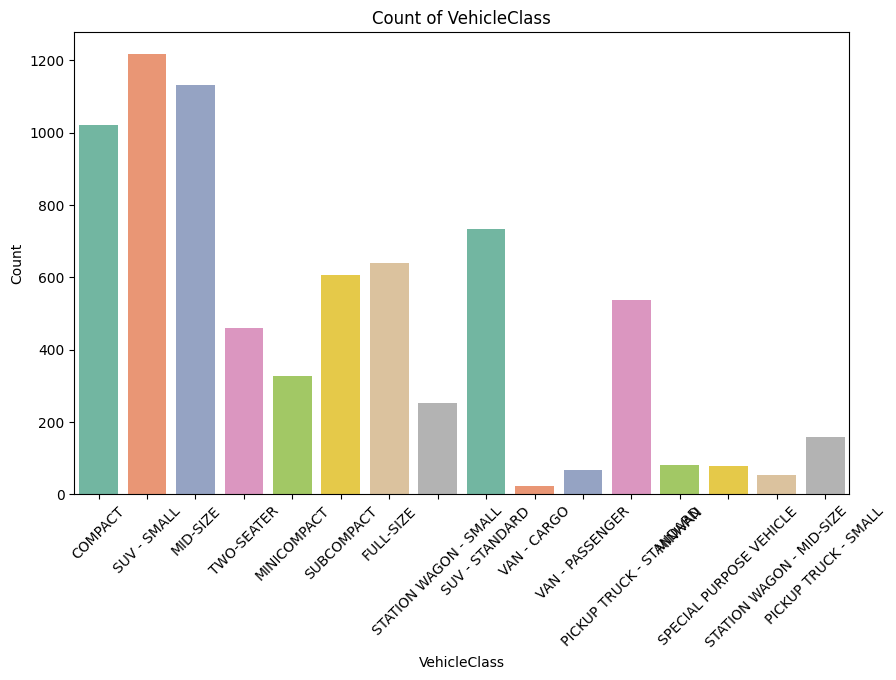

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['VehicleClass']

# Plot bar charts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


<ipython-input-318-05fadeecd2c6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


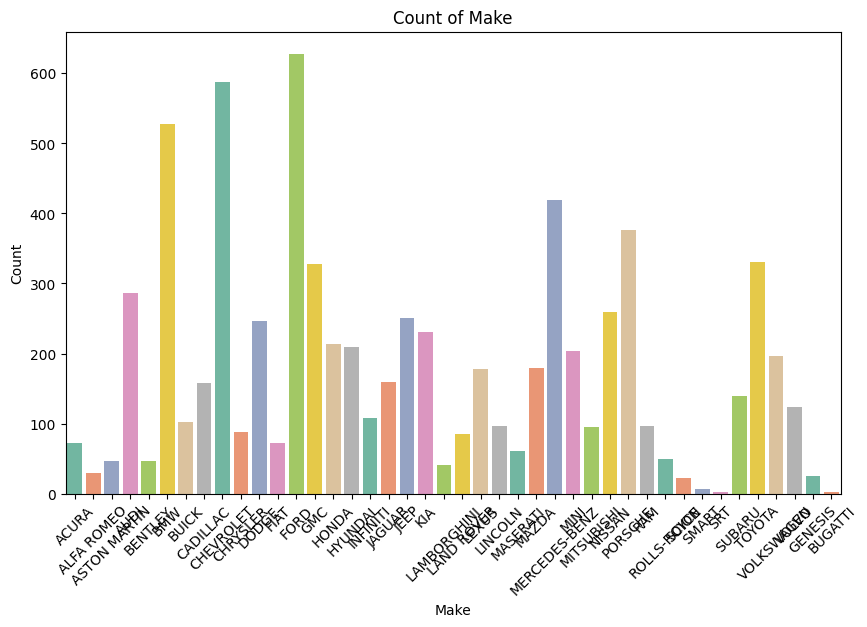

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Make']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


<ipython-input-316-df2fa768cd8a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


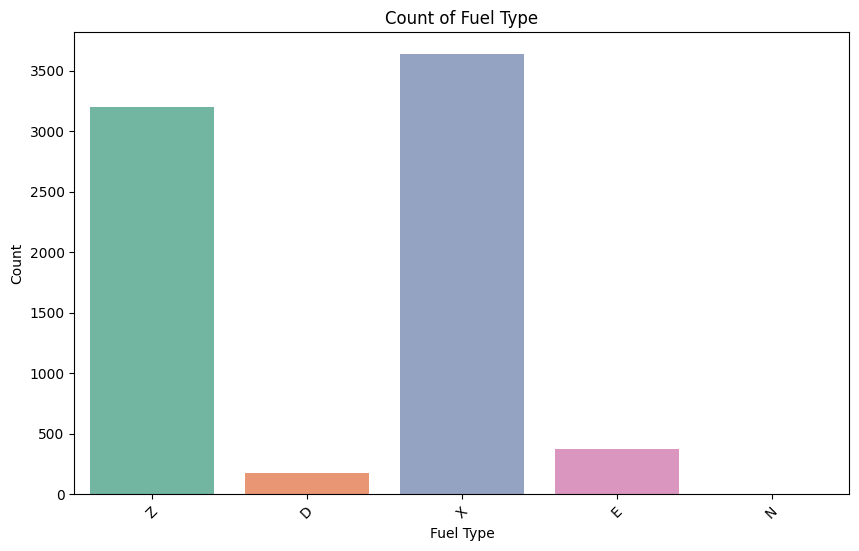

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Fuel Type']

# Plot bar charts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


<ipython-input-317-709ffe5b6b79>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


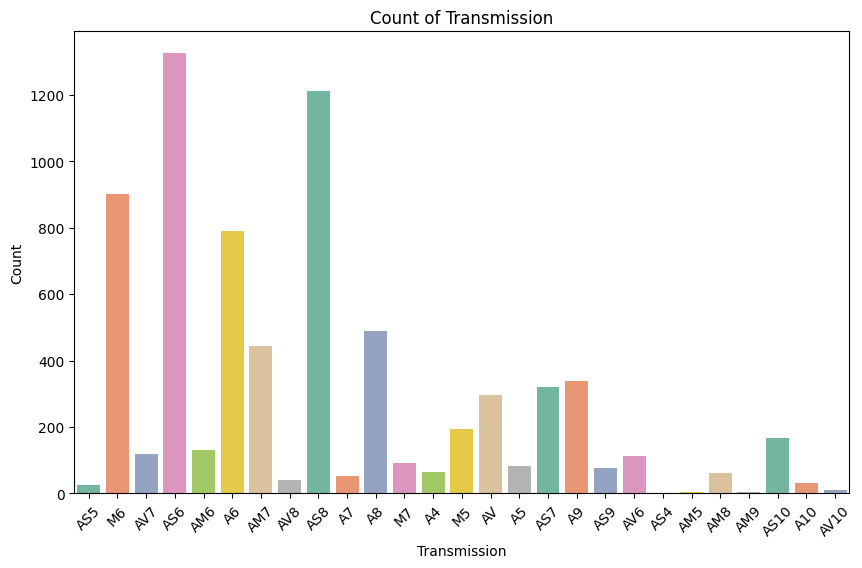

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Transmission']  # List only the feature you want to visualize

# Plot bar charts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


# Multivariate

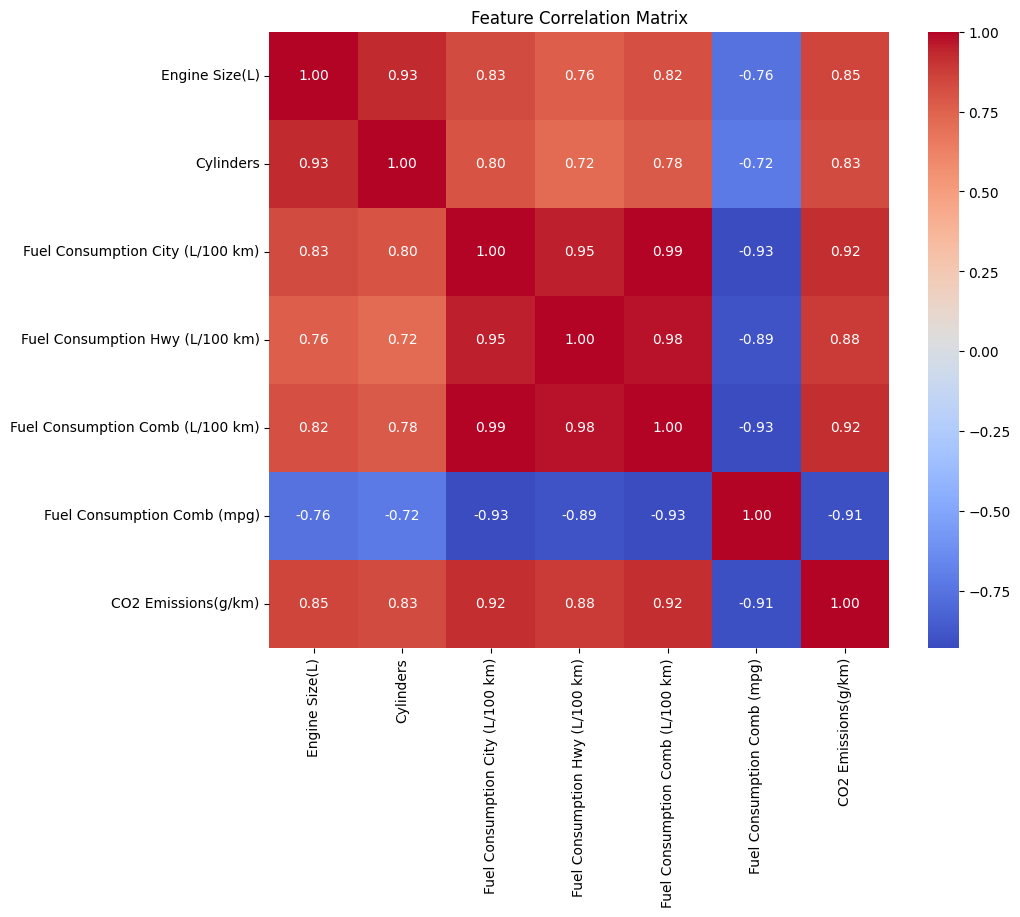

In [313]:

# 4. Correlation matrix (Exclude non-numeric columns)
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()



In [321]:
print(data.columns)


Index(['Make', 'Model', 'VehicleClass', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [13]:
data.shape

(7385, 12)

In [14]:
# 2. Check for missing values
print("\nMissing Values:")
print(data.isnull().sum().sum())


Missing Values:
1


In [15]:
# Drop rows with missing values
data_dropped_rows = data.dropna()

print("\nData After Dropping Rows with Missing Values:")
print(data_dropped_rows)



Data After Dropping Rows with Missing Values:
       Make        Model    VehicleClass  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z        

In [16]:
# 2. Check for missing values
print("\nMissing Values:")
print(data_dropped_rows.isnull().sum().sum())


Missing Values:
0


In [17]:
data.shape

(7385, 12)

In [18]:
object_columns = data.select_dtypes(include=['object']).columns
print(object_columns)

object_columns = data.select_dtypes(include=['float64']).columns
print(object_columns)

object_columns = data.select_dtypes(include=['int']).columns
print(object_columns)

Index(['Make', 'Model', 'VehicleClass', 'Transmission', 'Fuel Type'], dtype='object')
Index(['Engine Size(L)', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'],
      dtype='object')
Index(['Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'], dtype='object')


# Data Encodding

In [19]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd


categorical_columns = ['Model', 'Make', 'Transmission', 'VehicleClass', 'FuelType']


label_encoder = LabelEncoder()


for col in categorical_columns:
    if col in data.columns:

        data[col] = label_encoder.fit_transform(data[col])


        print(f"Encoded labels for {col}:")
        print(label_encoder.classes_)

print("\nUpdated feature set X:")
print(data.head())


Encoded labels for Model:
['124 SPIDER' '124 Spider' '1500' ... 'xB' 'xD' nan]
Encoded labels for Make:
['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUGATTI'
 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GENESIS'
 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI'
 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI'
 'MITSUBISHI' 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT'
 'SUBARU' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO']
Encoded labels for Transmission:
['A10' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'AM5' 'AM6' 'AM7' 'AM8' 'AM9' 'AS10'
 'AS4' 'AS5' 'AS6' 'AS7' 'AS8' 'AS9' 'AV' 'AV10' 'AV6' 'AV7' 'AV8' 'M5'
 'M6' 'M7']
Encoded labels for VehicleClass:
['COMPACT' 'FULL-SIZE' 'MID-SIZE' 'MINICOMPACT' 'MINIVAN'
 'PICKUP TRUCK - SMALL' 'PICKUP TRUCK - STANDARD'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'STATION WAGON - SMALL' 'SUBCOMPACT' 'SUV - SMALL' 'SUV - STANDARD'
 'TWO-SEATER' 'VAN - CARGO' 'VAN -

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Fuel Type'] = label_encoder.fit_transform(data['Fuel Type'])
print(data.head)


<bound method NDFrame.head of       Make  Model  VehicleClass  Engine Size(L)  Cylinders  Transmission  \
0        0   1057             0             2.0          4            14   
1        0   1057             0             2.4          4            25   
2        0   1058             0             1.5          4            22   
3        0   1233            11             3.5          6            15   
4        0   1499            11             3.5          6            15   
...    ...    ...           ...             ...        ...           ...   
7380    41   1951            11             2.0          4            17   
7381    41   1957            11             2.0          4            17   
7382    41   1960            11             2.0          4            17   
7383    41   1968            12             2.0          4            17   
7384    41   1969            12             2.0          4            17   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0   

# Feature Scaling

In [21]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Define scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                      'Fuel Consumption Hwy (L/100 km)','Fuel Type', 'Fuel Consumption Comb (L/100 km)',
                      'Fuel Consumption Comb (mpg)']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())


   Make  Model  VehicleClass  Engine Size(L)  Cylinders  Transmission  \
0     0   1057             0       -0.856721  -0.883408            14   
1     0   1057             0       -0.561317  -0.883408            25   
2     0   1058             0       -1.225976  -0.883408            22   
3     0   1233            11        0.251043   0.210575            15   
4     0   1499            11        0.251043   0.210575            15   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0   0.836161                         -0.759002   
1   0.836161                         -0.387577   
2   0.836161                         -1.873275   
3   0.836161                          0.040990   
4   0.836161                         -0.130437   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -1.052781                         -0.855742   
1                        -0.603202                         -0.475423   
2                        -1.457401          

# Checking Outlier

In [22]:
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outlier_condition = (data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))

# Display rows with outliers
outliers_rows = data[outlier_condition.any(axis=1)]
print(outliers_rows)


      Make  Model  VehicleClass  Engine Size(L)  Cylinders  Transmission  \
2        0   1058             0       -1.225976  -0.883408            22   
13       2    708             3        2.023466   3.492523             3   
14       2   1484            10        2.023466   3.492523             3   
19       2   1872             3        2.023466   3.492523             3   
28       3    247             2       -0.118212   0.210575            17   
...    ...    ...           ...             ...        ...           ...   
7326    39    621             2       -0.487466  -0.883408            19   
7335    39    683             0       -1.004423  -0.883408            19   
7341    39   1402             2       -1.004423  -0.883408            19   
7342    39   1403             2       -1.004423  -0.883408            19   
7343    39   1404             0       -1.225976  -0.883408            19   

      Fuel Type  Fuel Consumption City (L/100 km)  \
2      0.836161                   

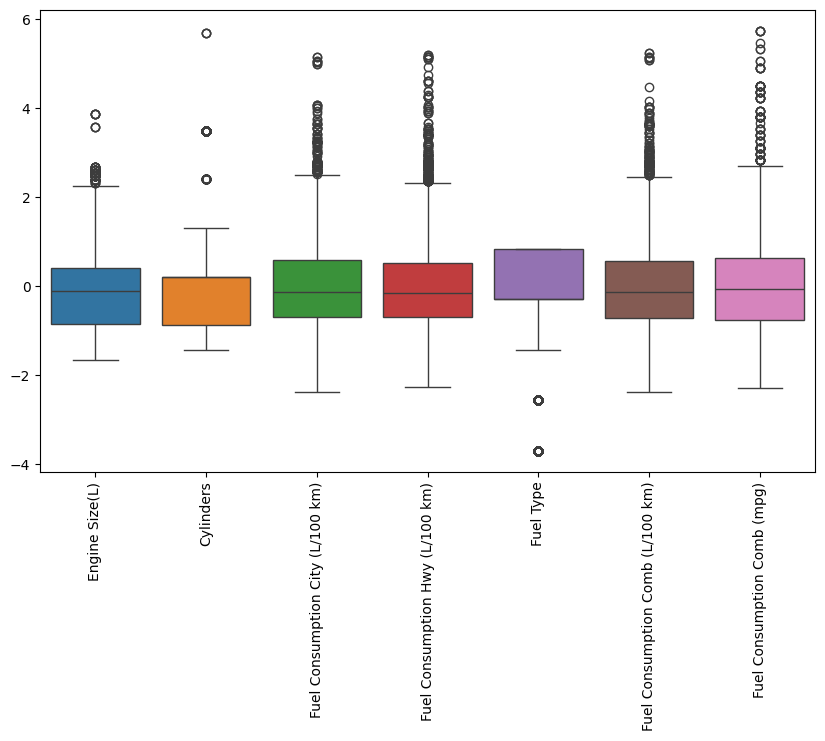

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for each numerical feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_features])
plt.xticks(rotation=90)
plt.show()


# Feature Selection

In [24]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

predictors = ['Make', 'Model', 'VehicleClass', 'Transmission', 'Fuel Type',
              'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
              'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
              'Fuel Consumption Comb (mpg)']
target = 'CO2 Emissions(g/km)'

X = data[predictors]
y = data[target]



# Normalization

In [25]:
# Normalize numeric features
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
data[['Engine Size(L)', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']] = min_max_scaler.fit_transform(data[['Engine Size(L)', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']])
print("Min-Max Normalized DataFrame:")
print(data)

Min-Max Normalized DataFrame:
      Make  Model  VehicleClass  Engine Size(L)  Cylinders  Transmission  \
0        0   1057             0        0.146667   0.076923            14   
1        0   1057             0        0.200000   0.076923            25   
2        0   1058             0        0.080000   0.076923            22   
3        0   1233            11        0.346667   0.230769            15   
4        0   1499            11        0.346667   0.230769            15   
...    ...    ...           ...             ...        ...           ...   
7380    41   1951            11        0.146667   0.076923            17   
7381    41   1957            11        0.146667   0.076923            17   
7382    41   1960            11        0.146667   0.076923            17   
7383    41   1968            12        0.146667   0.076923            17   
7384    41   1969            12        0.146667   0.076923            17   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0   

# Data Balancing

In [26]:
!pip install imbalanced-learn

In [264]:
from imblearn.under_sampling import TomekLinks
from sklearn.datasets import make_classification
from collections import Counter


X, y = make_classification(
    n_classes=2, class_sep=2, weights=[0.5, 0.5],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42
)

print(f"Original class distribution: {Counter(y)}")

# Apply Tomek Links
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)

print(f"Class distribution after Tomek: {Counter(y_res)}")


Original class distribution: Counter({1: 500, 0: 500})
Class distribution after Tomek: Counter({0: 500, 1: 499})


Class distribution after Tomek Links: Counter({0: 500, 1: 499})


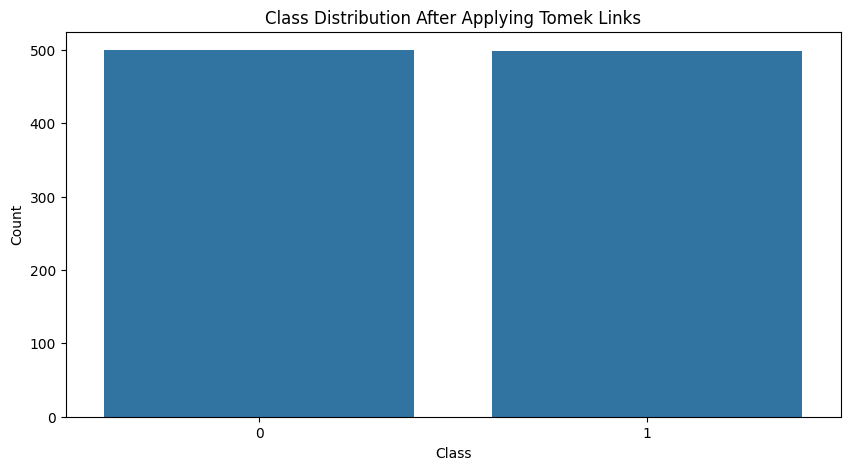

In [28]:
from imblearn.under_sampling import TomekLinks
from sklearn.datasets import make_classification
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Apply Tomek Links
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)

# Print class distribution after Tomek Links
resampled_distribution = Counter(y_res)
print(f"Class distribution after Tomek Links: {resampled_distribution}")

# Visualize the resampled class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=y_res)
plt.title("Class Distribution After Applying Tomek Links")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# Linear Regression

# linear regression using stochastic gradient descent (SGD) with polynomial features

Training MAE: 0.08, Training R²: 0.96
Testing MAE: 0.10, Testing R²: 0.92
Cross-Validation R²: 0.91 ± 0.01


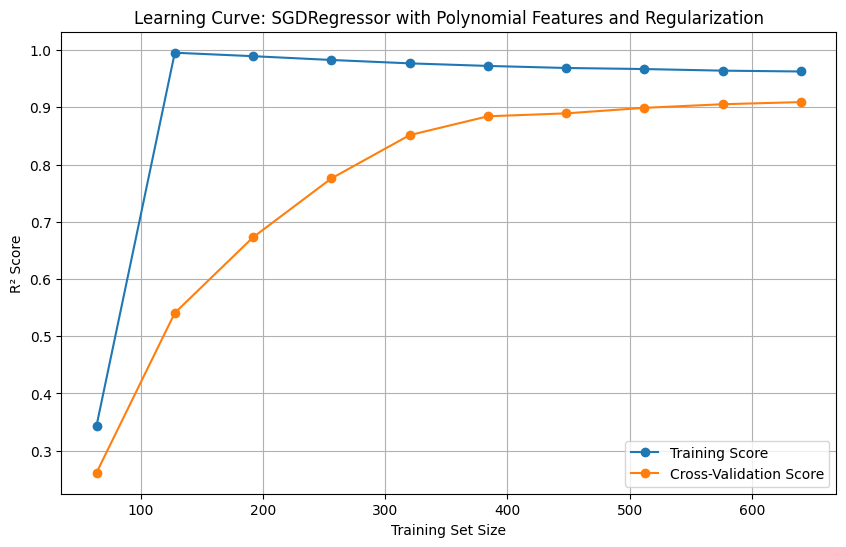

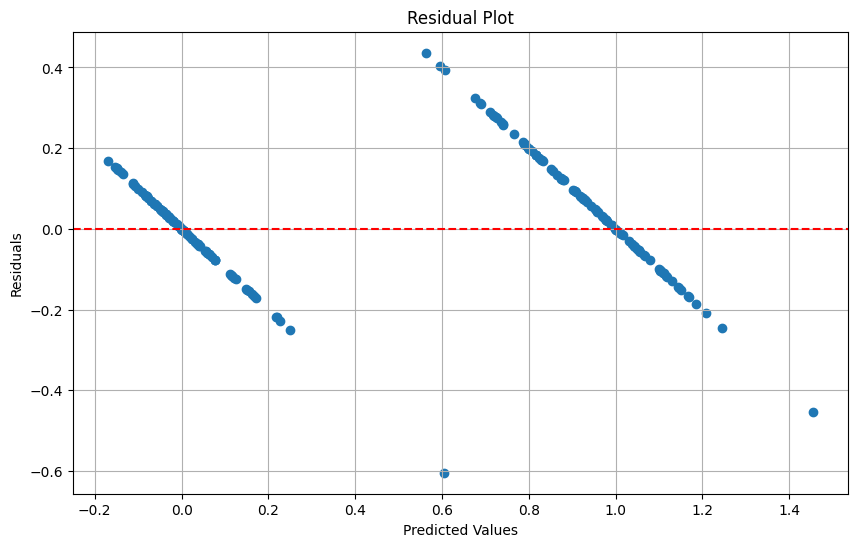

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# L2 regularization
model = SGDRegressor(learning_rate='invscaling', max_iter=1000, tol=1e-3, penalty='l2')  # L2 regularization

# Grid Search for Hyperparameter Tuning
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter': [1000, 5000],
    'tol': [1e-3, 1e-4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_poly, y_train)


best_model = grid_search.best_estimator_

# Predictions and Evaluation
y_pred_train = best_model.predict(X_train_poly)
y_pred_test = best_model.predict(X_test_poly)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MAE: {mae_train:.2f}, Training R²: {r2_train:.2f}")
print(f"Testing MAE: {mae_test:.2f}, Testing R²: {r2_test:.2f}")

# Cross-Validation
cv_scores = cross_val_score(best_model, X_train_poly, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_poly, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker='o')
plt.title("Learning Curve: SGDRegressor with Polynomial Features and Regularization")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Plot Residuals
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()


# Highly Correlated Features:

In [30]:
print(X_train.shape)


(800, 20)


In [31]:
X_train = X_train[:, :11]

In [32]:
import pandas as pd
import numpy as np

np.random.seed(42)
data = np.random.rand(100, 11)
feature_names = [
    'Make', 'Model', 'VehicleClass', 'Transmission', 'Fuel Type',
    'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
    'Fuel Consumption Comb (mpg)'
]


X_train_df = pd.DataFrame(data, columns=feature_names)

correlation_matrix = X_train_df.corr()


threshold = 0.2

highly_correlated_pairs = [
    (feature1, feature2)
    for feature1 in correlation_matrix.columns
    for feature2 in correlation_matrix.columns
    if feature1 != feature2 and abs(correlation_matrix[feature1][feature2]) > threshold
]

unique_correlated_pairs = list({tuple(sorted(pair)) for pair in highly_correlated_pairs})

print("Highly Correlated Features:", unique_correlated_pairs)


Highly Correlated Features: [('Fuel Consumption Comb (mpg)', 'Fuel Type')]


Pearson correlation between CO2 Emissions and Fuel Type: 0.10030610401073833


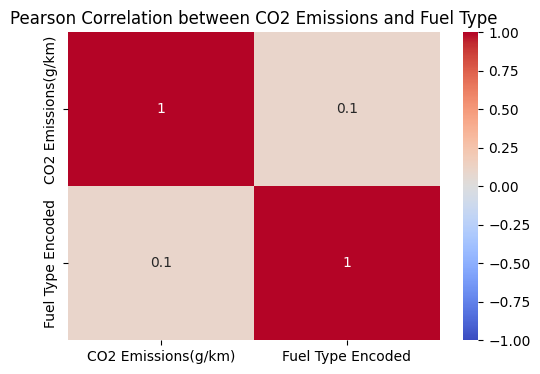

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode Fuel Type into numeric values
label_encoder = LabelEncoder()
data['Fuel Type Encoded'] = label_encoder.fit_transform(data['Fuel Type'])

# Calculate Pearson's correlation between 'CO2 Emissions(g/km)' and 'Fuel Type Encoded'
correlation = data[['CO2 Emissions(g/km)', 'Fuel Type Encoded']].corr(method='pearson')

# Print the correlation value
print(f"Pearson correlation between CO2 Emissions and Fuel Type: {correlation.iloc[0, 1]}")

# Plot the correlation as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation between CO2 Emissions and Fuel Type')
plt.show()


As in Fuel Type a very weak positive correlation insisted .We are considering it less important.

Pearson correlation between Fuel Consumption Comb (mpg) and CO2 Emissions(g/km): -0.9089116681157511


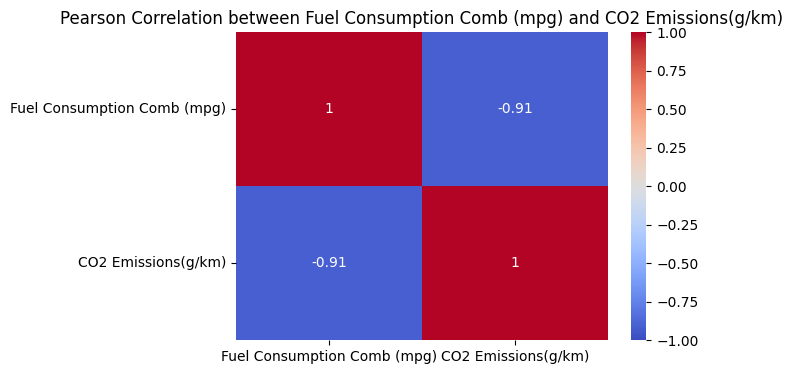

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode 'Fuel Type' into numeric values
label_encoder = LabelEncoder()
data['CO2 Emissions(g/km)'] = label_encoder.fit_transform(data['CO2 Emissions(g/km)'])

# Calculate Pearson's correlation between 'Fuel Consumption Comb (mpg)' and 'Fuel Type Encoded'
correlation = data[['Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']].corr(method='pearson')

# Print the correlation value
print(f"Pearson correlation between Fuel Consumption Comb (mpg) and CO2 Emissions(g/km): {correlation.iloc[0, 1]}")

# Plot the correlation as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation between Fuel Consumption Comb (mpg) and CO2 Emissions(g/km)')
plt.show()


## As fuel efficiency (mpg) increases, CO2 emissions tend to decrease. Vehicles that have better fuel efficiency (higher mpg) generally emit less CO2 per mile. This is one of the primary goals of improving fuel efficiency in the automotive industry—to reduce environmental impact.

<ipython-input-329-c727bd9204ab>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)', palette='Set2')


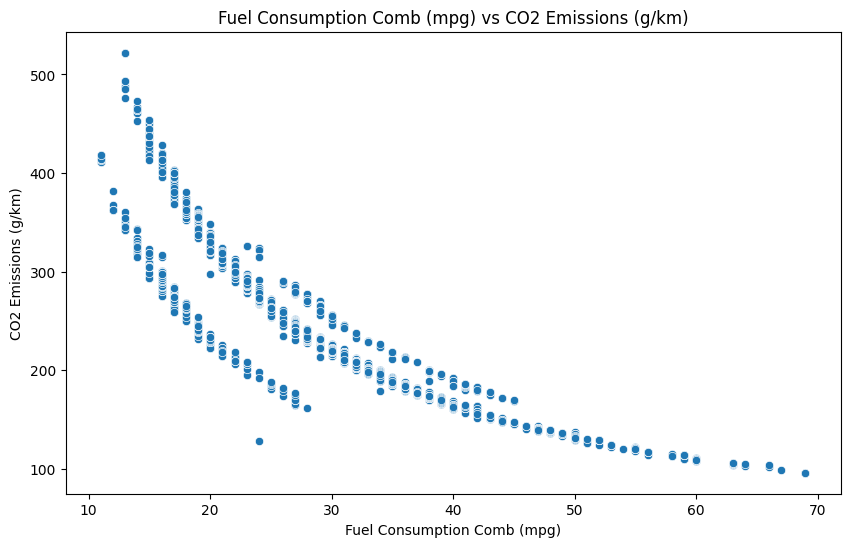

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between Fuel Consumption Comb (mpg) and CO2 Emissions (g/km)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)', palette='Set2')
plt.title('Fuel Consumption Comb (mpg) vs CO2 Emissions (g/km)')
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()


# Linear Regression: Feature Importance

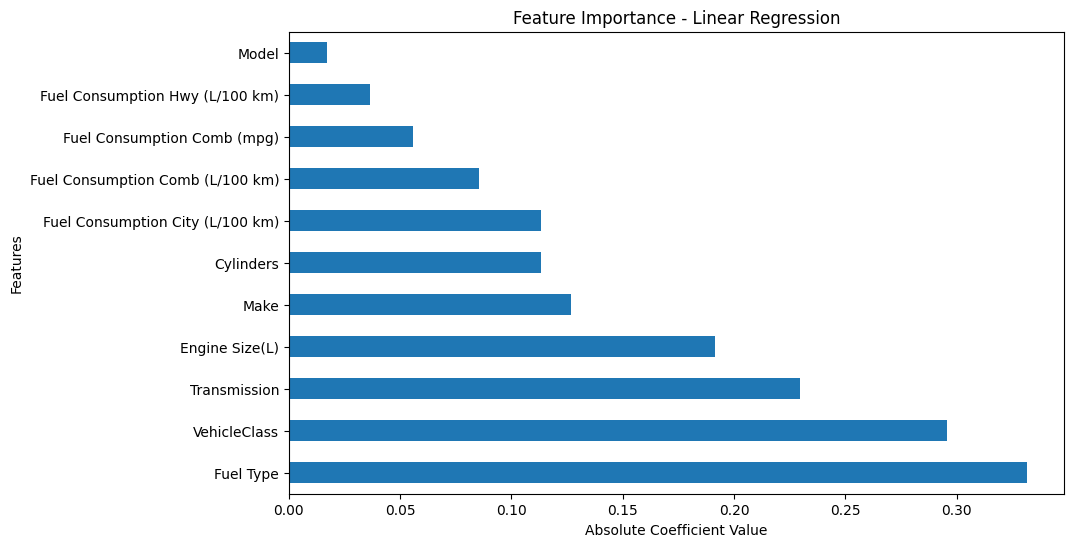

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y_train = pd.Series(y_train)


X_train_df, y_train = X_train_df.align(y_train, axis=0, join='inner')


lr_model = LinearRegression()
lr_model.fit(X_train_df, y_train)


coefficients = pd.Series(lr_model.coef_, index=X_train_df.columns)

coefficients.abs().sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()


## According to our analysis,In linear regression, Fuel Type has the highest coefficient which plays a crucial role in predicting the target variable, and the second most important feature is Vehicle Class.

# Decision Tree

In [211]:
X_train = X_train[:, :11]

In [265]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

if X_train.ndim == 3:
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)


model = DecisionTreeRegressor(random_state=42)


model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MAE: {mae_train:.2f}, Training R²: {r2_train:.2f}")
print(f"Testing MAE: {mae_test:.2f}, Testing R²: {r2_test:.2f}")


cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)


y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

mae_train_best = mean_absolute_error(y_train, y_pred_train_best)
mae_test_best = mean_absolute_error(y_test, y_pred_test_best)

r2_train_best = r2_score(y_train, y_pred_train_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

print(f"Best Model - Training MAE: {mae_train_best:.2f}, Training R²: {r2_train_best:.2f}")
print(f"Best Model - Testing MAE: {mae_test_best:.2f}, Testing R²: {r2_test_best:.2f}")


Shape of X_train: (800, 20)
Shape of X_test: (200, 20)
Training MAE: 0.00, Training R²: 1.00
Testing MAE: 0.01, Testing R²: 0.98
Cross-Validation R²: 0.99 ± 0.01
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model - Training MAE: 0.00, Training R²: 1.00
Best Model - Testing MAE: 0.01, Testing R²: 0.98


In [224]:
!pip install --upgrade xgboost


In [228]:
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


# Random Forest

In [34]:
y_train = y_train.ravel()
y_test = y_test.ravel()


<ipython-input-34-f3fb27a46506>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Training MAE: 0.05, Training R²: 0.99
Testing MAE: 0.11, Testing R²: 0.92
Cross-Validation R²: 0.92 ± 0.01


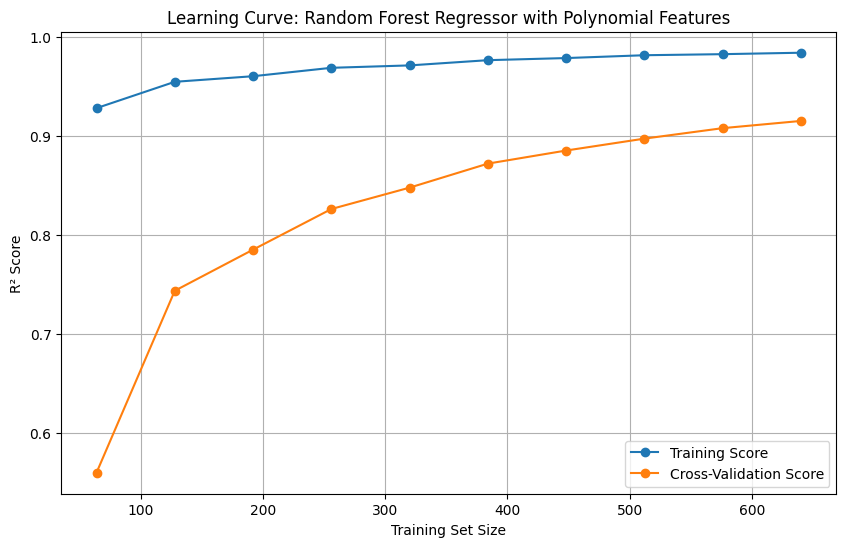

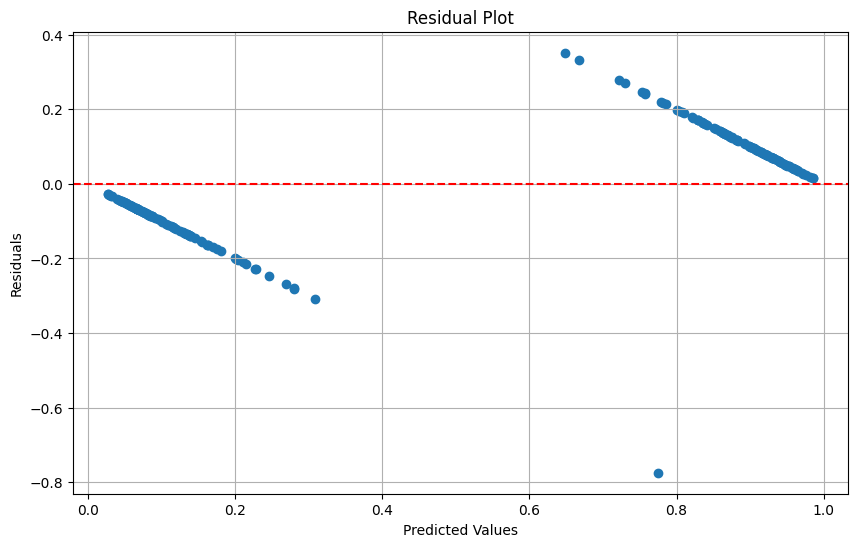

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_poly, y_train)


best_model = grid_search.best_estimator_


y_pred_train = best_model.predict(X_train_poly)
y_pred_test = best_model.predict(X_test_poly)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MAE: {mae_train:.2f}, Training R²: {r2_train:.2f}")
print(f"Testing MAE: {mae_test:.2f}, Testing R²: {r2_test:.2f}")


cv_scores = cross_val_score(best_model, X_train_poly, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_poly, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker='o')
plt.title("Learning Curve: Random Forest Regressor with Polynomial Features")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid()
plt.show()


residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()


In [ ]:
!pip install --upgrade scikit-learn


# Random Forest-Cross Validation

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


rf_model = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')


grid_search.fit(X_train, y_train.ravel())

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9928511300231644


# Random Forest-Hyper Parameter Optimization

In [42]:

best_rf_model = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)


best_rf_model.fit(X_train, y_train)

y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"Random Forest with Optimized Hyperparameters")
print(f"Training, Mean Absolute Error: {mae_train_rf:.2f}, R² Score: {r2_train_rf:.2f}")
print(f"Testing, Mean Absolute Error: {mae_test_rf:.2f}, R² Score: {r2_test_rf:.2f}")


Random Forest with Optimized Hyperparameters
Training, Mean Absolute Error: 0.00, R² Score: 1.00
Testing, Mean Absolute Error: 0.01, R² Score: 0.98


In [44]:
X_train = X_train[:, :11]

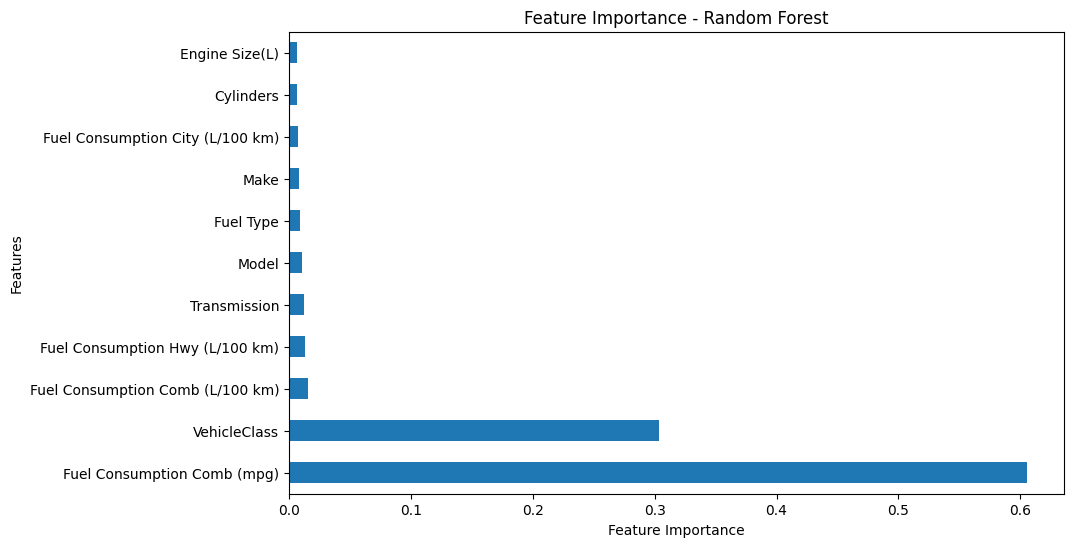

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


column_names = ['Make', 'Model', 'VehicleClass', 'Transmission', 'Fuel Type',
                'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                'Fuel Consumption Comb (mpg)']

X_train = pd.DataFrame(X_train, columns=column_names)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)


feature_importance.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


# According to our analysis,In Random Forest regression, Fuel Consumption Comb(mpg) has the highest coefficient which plays a crucial role in predicting the target variable, and the second most important feature is Vehicle Class.

# LSTM

In [120]:
print(X.shape)


(1000, 20)


In [141]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


print(f"Shape of data: {data.shape}")
column_names = [f'Feature_{i+1}' for i in range(11)]

data = pd.DataFrame(data, columns=column_names)
X = data.drop(columns=['Feature_1'])
print(f"Shape of X after conversion: {X.shape}")

X = pd.get_dummies(X)
print(f"Number of columns in X after one-hot encoding: {X.shape[1]}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
y = data['Feature_1']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Shape of data: (100, 11)
Shape of X after conversion: (100, 10)
Number of columns in X after one-hot encoding: 10


Shape of X after conversion: (100, 10)
Number of columns in X after one-hot encoding: 10
Shapes after splitting - X_train: (80, 1, 10), X_test: (20, 1, 10), y_train: (80,), y_test: (20,)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - loss: 0.3069 - val_loss: 0.2447
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3175 - val_loss: 0.2225
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2860 - val_loss: 0.2033
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2478 - val_loss: 0.1856
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2438 - val_loss: 0.1690
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2090 - val_loss: 0.1539
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1781 - val_loss: 0.1403
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1618 - val_loss: 0.1282
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1615 - val_loss: 0.1173
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1545 - val_loss: 0.1080
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1268 - val_loss: 0.1007
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1097 - val_loss: 0.0940
Epoch 13/50

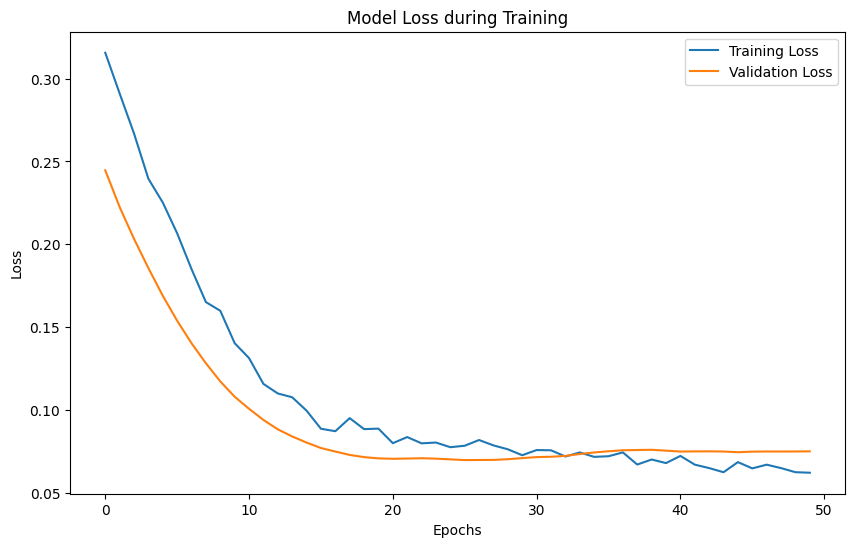

In [142]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


column_names = [f'Feature_{i+1}' for i in range(11)]
data = pd.DataFrame(data, columns=column_names)


y = data['Feature_1']

X = data.drop(columns=['Feature_1'])

print(f"Shape of X after conversion: {X.shape}")

X = pd.get_dummies(X)

print(f"Number of columns in X after one-hot encoding: {X.shape[1]}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Shapes after splitting - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


model = Sequential()


model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))


model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MAE: {train_mae:.2f}, Training R²: {train_r2:.2f}")
print(f"Testing MAE: {test_mae:.2f}, Testing R²: {test_r2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [143]:
pip install keras-tuner


In [145]:
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout', 0, 0.5, step=0.1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tuner = RandomSearch(build_model,
                     objective='val_loss',
                     max_trials=5,
                     executions_per_trial=3,
                     directory='my_dir',
                     project_name='helloworld')

tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_test, y_test))


Reloading Tuner from my_dir/helloworld/tuner0.json


In [146]:

best_model = tuner.get_best_models(num_models=1)[0]


test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - loss: 0.0610
Test Loss: 0.0610


In [147]:
y_pred_test = best_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


In [148]:
from sklearn.metrics import mean_absolute_error, r2_score

test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Testing MAE: {test_mae:.2f}, Testing R²: {test_r2:.2f}")


Testing MAE: 0.22, Testing R²: 0.22


In [149]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_train = best_model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MAE: {train_mae:.2f}, Training R²: {train_r2:.2f}")
print(f"Testing MAE: {test_mae:.2f}, Testing R²: {test_r2:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
Training MAE: 0.25, Training R²: 0.15
Testing MAE: 0.22, Testing R²: 0.22


In [150]:
best_model.save('best_lstm_model.h5')


In [151]:
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=True))
    model.add(Dropout(rate=hp.Float('dropout', 0, 0.5, step=0.1)))

    if hp.Boolean('add_second_lstm'):
        model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=256, step=32), return_sequences=False))
        model.add(Dropout(rate=hp.Float('dropout_2', 0, 0.5, step=0.1)))

    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tuner = RandomSearch(build_model,
                     objective='val_loss',
                     max_trials=10,
                     executions_per_trial=3,
                     directory='my_dir',
                     project_name='lstm_tuning')

tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_test, y_test))


Reloading Tuner from my_dir/lstm_tuning/tuner0.json


In [152]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_poly_df = pd.DataFrame(X_poly)

X_poly_encoded = pd.get_dummies(X_poly_df)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly_encoded)


X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [153]:
from keras.regularizers import l2

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=True,
                   kernel_regularizer=l2(hp.Float('l2_reg', 0.01, 0.1))))  # L2 regularization
    model.add(Dropout(rate=hp.Float('dropout', 0, 0.5, step=0.1)))



In [154]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]




Shape of X after conversion: (100, 10)
Number of columns in X after one-hot encoding: 10
Shapes after splitting - X_train: (80, 1, 10), X_test: (20, 1, 10), y_train: (80,), y_test: (20,)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - loss: 0.3513 - val_loss: 0.2554
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3284 - val_loss: 0.2208
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2807 - val_loss: 0.1915
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2334 - val_loss: 0.1693
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2114 - val_loss: 0.1492
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2025 - val_loss: 0.1318
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1695 - val_loss: 0.1187
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1654 - val_loss: 0.1063
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1502 - val_loss: 0.0967
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1303 - val_loss: 0.0881
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1088 - val_loss: 0.0822
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1125 - val_loss: 0.0774
Epoch 13/50

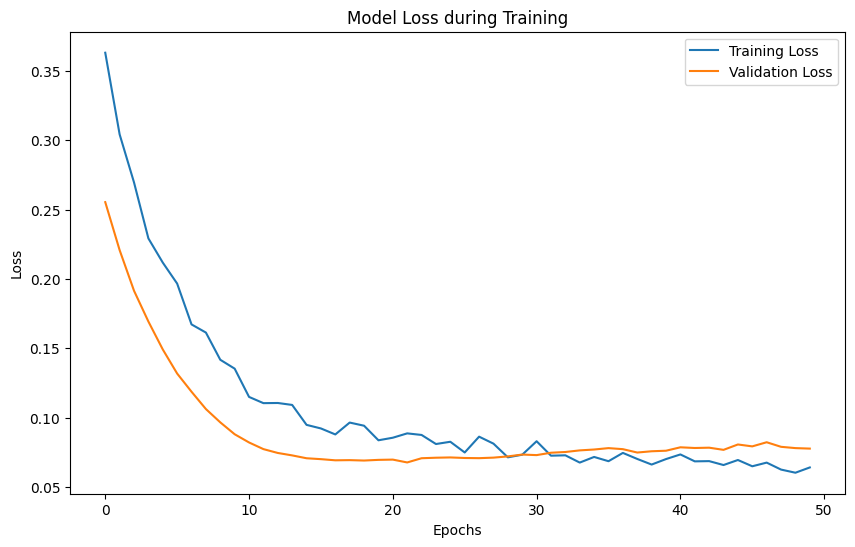

In [159]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

column_names = [f'Feature_{i+1}' for i in range(11)]
data = pd.DataFrame(data, columns=column_names)

y = data['Feature_1']

X = data.drop(columns=['Feature_1'])

print(f"Shape of X after conversion: {X.shape}")

X = pd.get_dummies(X)


print(f"Number of columns in X after one-hot encoding: {X.shape[1]}")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


print(f"Shapes after splitting - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

model = Sequential()

model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(32, activation='relu'))

model.add(Dense(1))


model.compile(optimizer='RMSprop', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MAE: {train_mae:.2f}, Training R²: {train_r2:.2f}")
print(f"Testing MAE: {test_mae:.2f}, Testing R²: {test_r2:.2f}")


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


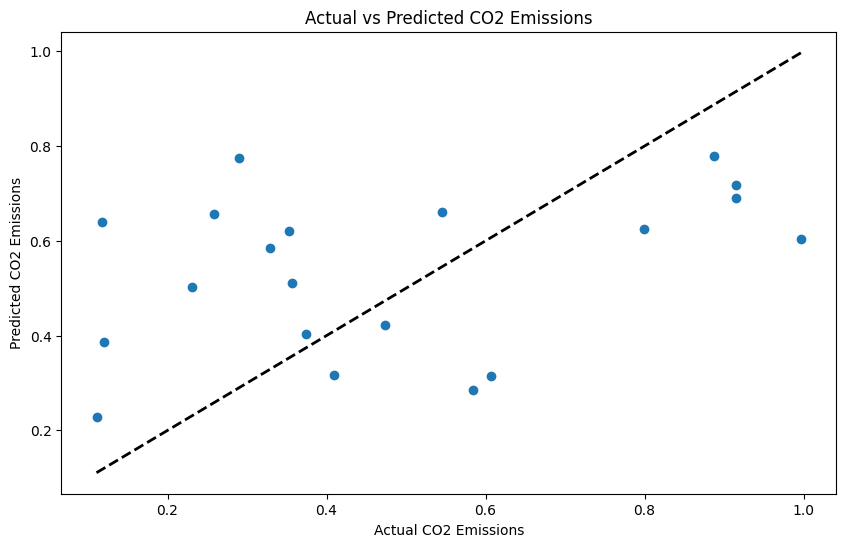

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()


In [196]:
pip install torch torchvision


In [198]:
pip install shap

In [200]:
pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.2 MB/s eta 0:00:00


# Bidirectional LSTM

In [160]:
from keras.regularizers import l2
from keras.layers import Dropout, Bidirectional

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]),
               return_sequences=False,
               kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - loss: 0.5937 - val_loss: 0.4928
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5628 - val_loss: 0.4494
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5081 - val_loss: 0.4104
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4886 - val_loss: 0.3755
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4463 - val_loss: 0.3444
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4037 - val_loss: 0.3173
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3855 - val_loss: 0.2933
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3611 - val_loss: 0.2721
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3327 - val_loss: 0.2536
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2917 - val_loss: 0.2375
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2731 - val_loss: 0.2227
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2650 - val_loss: 0.2098


In [162]:
from keras.regularizers import l2
from keras.layers import Dropout, Bidirectional
from sklearn.metrics import mean_absolute_error


model = Sequential()

model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]),
               return_sequences=False,
               kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))


model.add(Dense(32, activation='relu'))


model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)


train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)


print(f"Training Loss: {train_loss:.4f}, Training MAE: {train_mae:.4f}")
print(f"Testing Loss: {test_loss:.4f}, Testing MAE: {test_mae:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 464ms/step - loss: 0.5616 - val_loss: 0.4865
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.5296 - val_loss: 0.4505
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5161 - val_loss: 0.4171
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.4952 - val_loss: 0.3870
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.4277 - val_loss: 0.3599
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3892 - val_loss: 0.3350
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3792 - val_loss: 0.3123
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3410 - val_loss: 0.2923
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3299 - val_loss: 0.2743
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2920 - val_loss: 0.2580
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2872 - val_loss: 0.2428
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2636 - val_loss: 0.2288

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1089


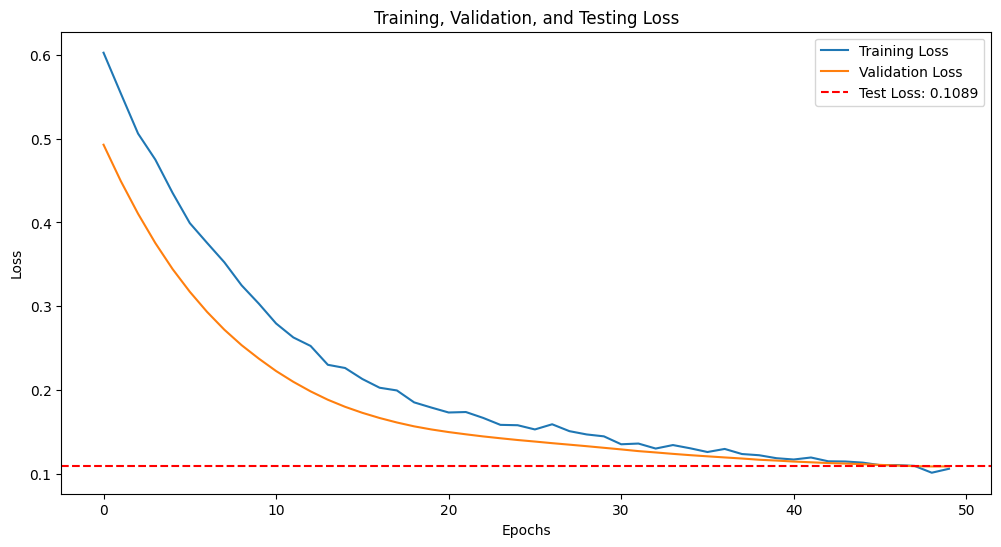

Testing Loss: 0.1089


In [161]:

test_loss = model.evaluate(X_test, y_test)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss: {test_loss:.4f}')

plt.title('Training, Validation, and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


print(f"Testing Loss: {test_loss:.4f}")


In [164]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.1187 - val_loss: 0.0881
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1090 - val_loss: 0.0873
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0968 - val_loss: 0.0868
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1029 - val_loss: 0.0864
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0995 - val_loss: 0.0860
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1032 - val_loss: 0.0858
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1039 - val_loss: 0.0856
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0962 - val_loss: 0.0856
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1029 - val_loss: 0.0851
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0997 - val_loss: 0.0846
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0993 - val_loss: 0.0842
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1047 - val_loss: 0.0835


# Support Vector Regression (SVR)

Training MAE: 0.01, Training R²: 1.00, Training MSE: 0.00
Testing MAE: 0.20, Testing R²: 0.78, Testing MSE: 0.06
Cross-Validation R²: 0.78 ± 0.02


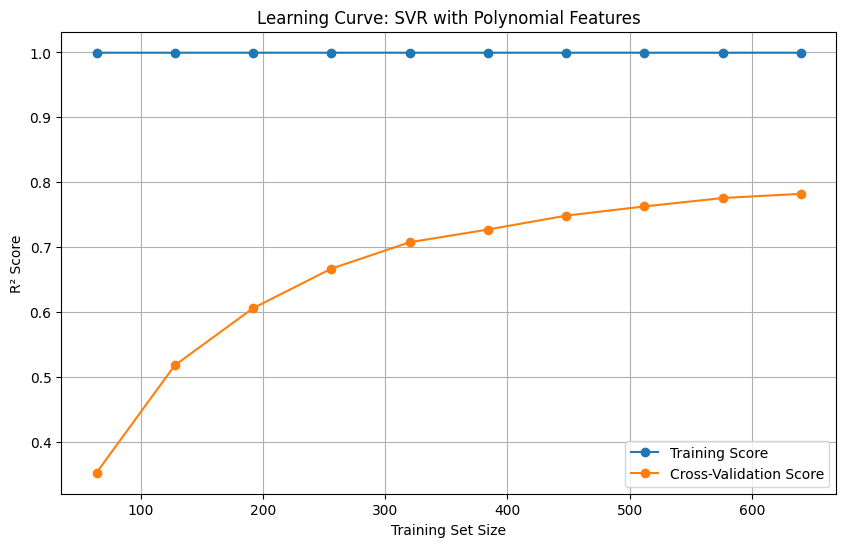

In [77]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


model = SVR(kernel='rbf')


param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'epsilon': [0.01, 0.05, 0.1, 0.2],
    'gamma': ['scale', 'auto', 0.01, 0.1],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_poly, y_train)

best_model = grid_search.best_estimator_


y_pred_train = best_model.predict(X_train_poly)
y_pred_test = best_model.predict(X_test_poly)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Training MAE: {mae_train:.2f}, Training R²: {r2_train:.2f}, Training MSE: {mse_train:.2f}")
print(f"Testing MAE: {mae_test:.2f}, Testing R²: {r2_test:.2f}, Testing MSE: {mse_test:.2f}")

cv_scores = cross_val_score(best_model, X_train_poly, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_poly, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker='o')
plt.title("Learning Curve: SVR with Polynomial Features")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# LIGHTGBM

In [85]:
!pip install lightgbm

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1843
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 65
[LightGBM] [Info] Start training from score 0.523696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate 

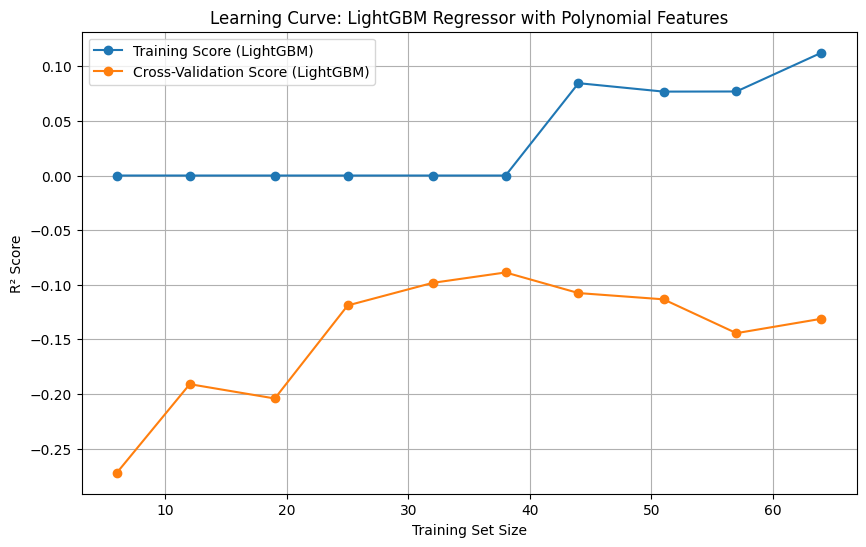

In [182]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse')

param_grid_lgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5]
}

grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_lgb.fit(X_train_poly, y_train)


best_model_lgb = grid_search_lgb.best_estimator_


y_pred_train_lgb = best_model_lgb.predict(X_train_poly)
y_pred_test_lgb = best_model_lgb.predict(X_test_poly)

mae_train_lgb = mean_absolute_error(y_train, y_pred_train_lgb)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test_lgb)

r2_train_lgb = r2_score(y_train, y_pred_train_lgb)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)

print(f"Training MAE (LightGBM): {mae_train_lgb:.2f}, Training R² (LightGBM): {r2_train_lgb:.2f}")
print(f"Testing MAE (LightGBM): {mae_test_lgb:.2f}, Testing R² (LightGBM): {r2_test_lgb:.2f}")

cv_scores_lgb = cross_val_score(best_model_lgb, X_train_poly, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² (LightGBM): {cv_scores_lgb.mean():.2f} ± {cv_scores_lgb.std():.2f}")


train_sizes, train_scores, test_scores = learning_curve(
    best_model_lgb, X_train_poly, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean_lgb = np.mean(train_scores, axis=1)
test_scores_mean_lgb = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean_lgb, label="Training Score (LightGBM)", marker='o')
plt.plot(train_sizes, test_scores_mean_lgb, label="Cross-Validation Score (LightGBM)", marker='o')
plt.title("Learning Curve: LightGBM Regressor with Polynomial Features")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [208]:

y_pred_train_lgb = best_model_lgb.predict(X_train_poly)
y_pred_test_lgb = best_model_lgb.predict(X_test_poly)

mae_train_lgb = mean_absolute_error(y_train, y_pred_train_lgb)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test_lgb)

r2_train_lgb = r2_score(y_train, y_pred_train_lgb)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)

print(f"Training MAE (LightGBM): {mae_train_lgb:.2f}, Training R² (LightGBM): {r2_train_lgb:.2f}")
print(f"Testing MAE (LightGBM): {mae_test_lgb:.2f}, Testing R² (LightGBM): {r2_test_lgb:.2f}")


Training MAE (LightGBM): 0.26, Training R² (LightGBM): 0.12
Testing MAE (LightGBM): 0.25, Testing R² (LightGBM): -0.05


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Xgboost

In [250]:
pip install --upgrade xgboost


In [238]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)


xgb_model = XGBRegressor()

xgb_model.fit(X_train_2d, y_train)

y_pred_train_xgb = xgb_model.predict(X_train_2d)
y_pred_test_xgb = xgb_model.predict(X_test_2d)

y_train = y_train.ravel()
y_pred_train_xgb = y_pred_train_xgb.ravel()

y_test = y_test.ravel()
y_pred_test_xgb = y_pred_test_xgb.ravel()

mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

print(f"Training MAE (XGBoost): {mae_train_xgb:.2f}, Training R² (XGBoost): {r2_train_xgb:.2f}")
print(f"Testing MAE (XGBoost): {mae_test_xgb:.2f}, Testing R² (XGBoost): {r2_test_xgb:.2f}")


Training MAE (XGBoost): 0.00, Training R² (XGBoost): 1.00
Testing MAE (XGBoost): 0.27, Testing R² (XGBoost): -0.22


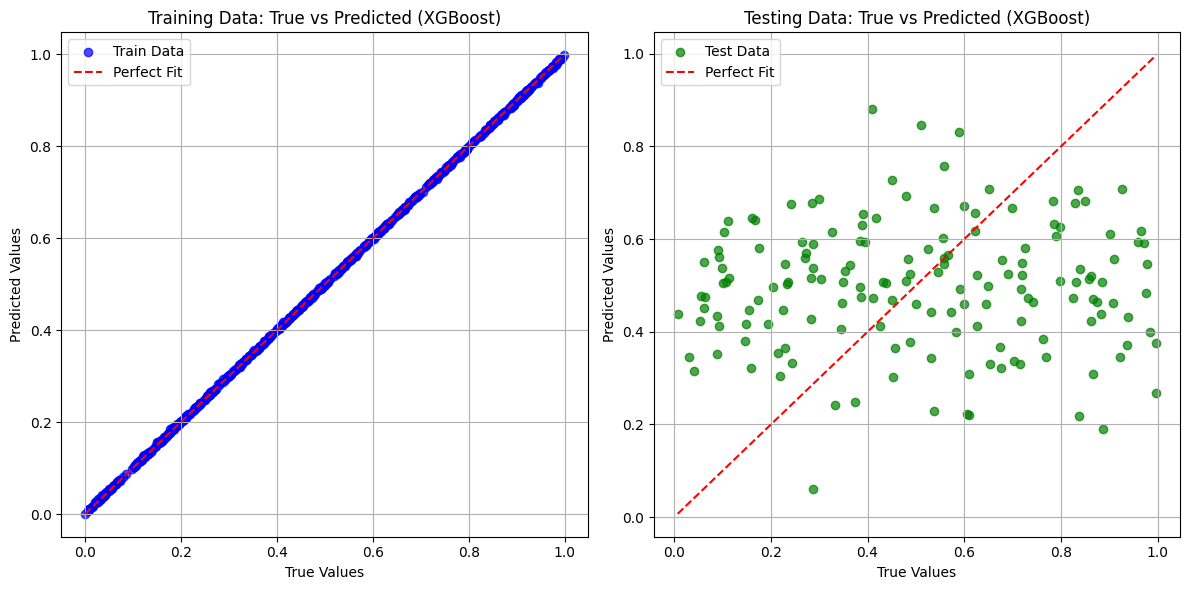

In [240]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_xgb, alpha=0.7, color='blue', label="Train Data")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label="Perfect Fit")
plt.title("Training Data: True vs Predicted (XGBoost)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_xgb, alpha=0.7, color='green', label="Test Data")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.title("Testing Data: True vs Predicted (XGBoost)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Catboost

In [87]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


In [88]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score


catboost_model = CatBoostRegressor(learning_rate=0.1, depth=5, iterations=100, l2_leaf_reg=3, silent=True)

# Train the model
catboost_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_train_catboost = catboost_model.predict(X_train_poly)
y_pred_test_catboost = catboost_model.predict(X_test_poly)

# Evaluate the model
mae_train_catboost = mean_absolute_error(y_train, y_pred_train_catboost)
mae_test_catboost = mean_absolute_error(y_test, y_pred_test_catboost)

r2_train_catboost = r2_score(y_train, y_pred_train_catboost)
r2_test_catboost = r2_score(y_test, y_pred_test_catboost)

print(f"Training MAE (CatBoost): {mae_train_catboost:.2f}, Training R² (CatBoost): {r2_train_catboost:.2f}")
print(f"Testing MAE (CatBoost): {mae_test_catboost:.2f}, Testing R² (CatBoost): {r2_test_catboost:.2f}")


Training MAE (CatBoost): 0.01, Training R² (CatBoost): 1.00
Testing MAE (CatBoost): 0.02, Testing R² (CatBoost): 0.99


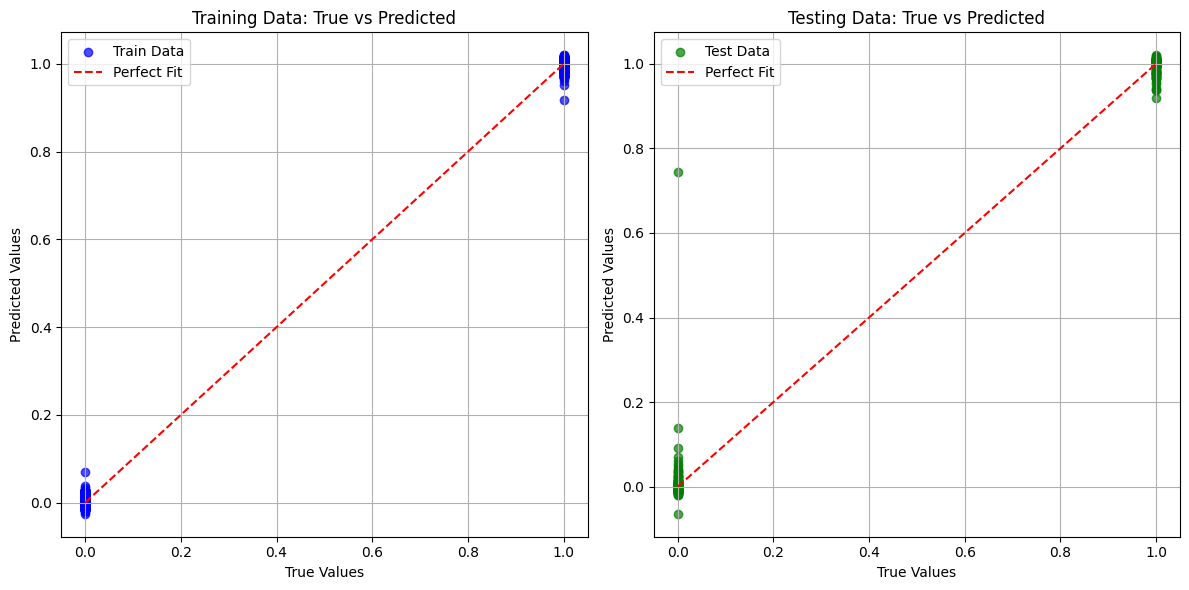

In [89]:
import matplotlib.pyplot as plt

# Plot True vs Predicted values for Training and Testing sets
plt.figure(figsize=(12, 6))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_catboost, alpha=0.7, color='blue', label="Train Data")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label="Perfect Fit")
plt.title("Training Data: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_catboost, alpha=0.7, color='green', label="Test Data")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.title("Testing Data: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [94]:
X_train = X_train[:, :11]

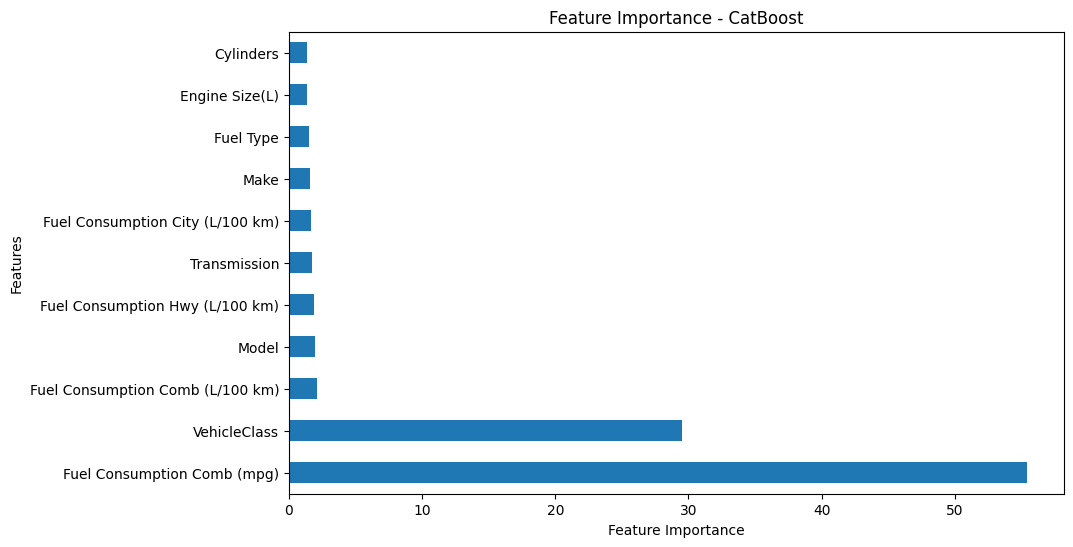

In [95]:
import pandas as pd
import catboost
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# Assuming X_train has 11 columns, so we need 11 column names
column_names = ['Make', 'Model', 'VehicleClass', 'Transmission', 'Fuel Type',
                'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                'Fuel Consumption Comb (mpg)']  # Replace with the correct column names

# If X_train is a NumPy array, convert it to a Pandas DataFrame
X_train = pd.DataFrame(X_train, columns=column_names)

# Initialize and train a CatBoost model
catboost_model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.05, loss_function='RMSE', verbose=0)
catboost_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(catboost_model.get_feature_importance(), index=X_train.columns)

# Plot feature importance
feature_importance.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance - CatBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


## According to our analysis,In Catboost regression, Fuel Consumption Comb(mpg) has the highest coefficient which plays a crucial role in predicting the target variable, and the second most important feature is Vehicle Class similar as random forest regression

# Hybrid model

In [96]:
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from catboost import CatBoostRegressor

# Initialize base models
catboost_model = CatBoostRegressor(learning_rate=0.1, depth=5, iterations=100, l2_leaf_reg=3, silent=True)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Meta-model
meta_model = LinearRegression()

# Stacking Regressor
stacked_model = StackingRegressor(
    estimators=[('catboost', catboost_model), ('knn', knn_model)],
    final_estimator=meta_model
)


stacked_model.fit(X_train_poly, y_train)

y_pred_train = stacked_model.predict(X_train_poly)
y_pred_test = stacked_model.predict(X_test_poly)


train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MAE: {train_mae:.2f}, Training R²: {train_r2:.2f}")
print(f"Testing MAE: {test_mae:.2f}, Testing R²: {test_r2:.2f}")


Training MAE: 0.01, Training R²: 1.00
Testing MAE: 0.02, Testing R²: 0.99


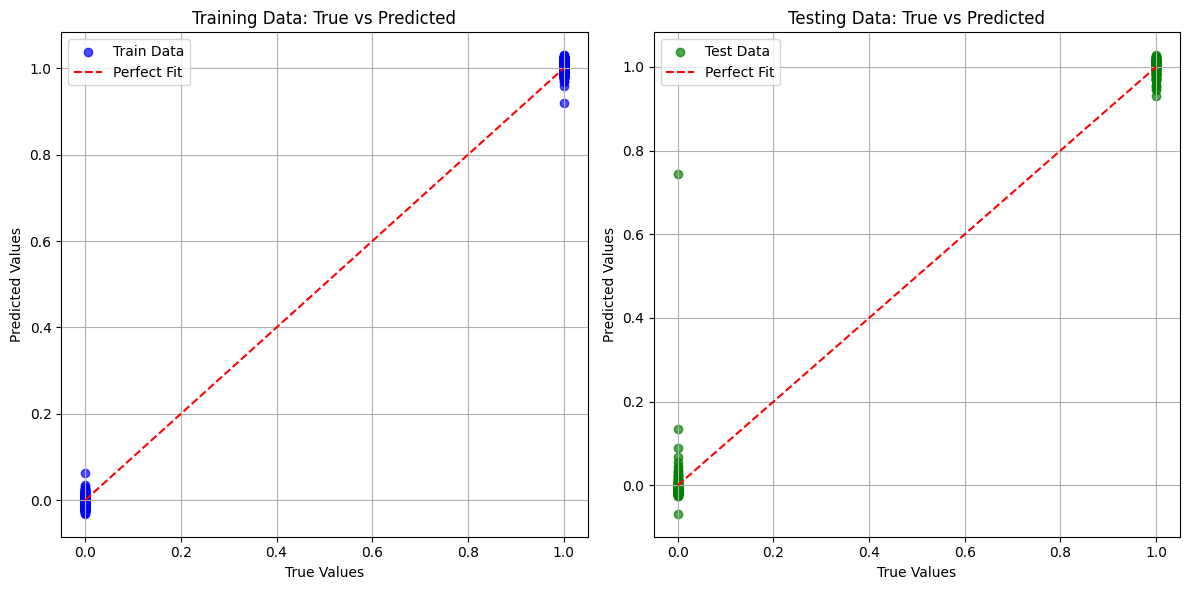

In [97]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.7, color='blue', label="Train Data")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label="Perfect Fit")
plt.title("Training Data: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.7, color='green', label="Test Data")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.title("Testing Data: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [101]:

print(X_train_poly.shape)
print(y_train.shape)


if X_train_poly.shape[0] != y_train.shape[0]:
    y_train = y_train[:X_train_poly.shape[0]]


stacked_model.fit(X_train_poly, y_train)


(800, 20)
(800,)


StackingRegressor(estimators=[('catboost',
                               <catboost.core.CatBoostRegressor object at 0x7ef54dff64a0>),
                              ('knn', KNeighborsRegressor())],
                  final_estimator=LinearRegression())

# **Conclusion:**

#**Best Model** was **Hybrid model and CatBoost** But Random Forest and Linear Regression also performed well, with Random Forest having the best balance between training and testing performance.**Best Feature** was **Fuel Consumption Comb (mpg)** models such as Random Forest, CatBoost, and XGBoost.Vehicle Class was also consistently important in multiple models like Linear Regression, Random Forest, and CatBoost.Fuel Consumption Comb (mpg) and Fuel Type may cause multicollinearity, potentially impacting model performance.**XGBoost and LightGBM** has struggled with **overfitting**.Due to low testing R² and higher MAE that was the **limitation.**



.